In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data.csv")

In [3]:
# Drop unnecessary columns
data = data.drop(data.columns[[0, 1, 2]],axis = 1)

In [4]:
# Convert categorical variables to numerical
cat_indexes = [0, 1, 3, 4, 22] + list(range(6, 20))

for col_index in cat_indexes:
    le = LabelEncoder()
    data[data.columns[col_index]] = le.fit_transform(data[data.columns[col_index]])

In [5]:
data.shape

(129880, 23)

In [6]:
column_to_move = data.pop('satisfaction')
data.insert(22, 'satisfaction', column_to_move)

In [7]:
data.shape

(129880, 23)

In [8]:
data.isna().sum()

Gender                                 0
Customer.Type                          0
Age                                    0
Type.of.Travel                         0
Class                                  0
Flight.Distance                        0
Inflight.wifi.service                  0
Departure.Arrival.time.convenient      0
Ease.of.Online.booking                 0
Gate.location                          0
Food.and.drink                         0
Online.boarding                        0
Seat.comfort                           0
Inflight.entertainment                 0
On.board.service                       0
Leg.room.service                       0
Baggage.handling                       0
Checkin.service                        0
Inflight.service                       0
Cleanliness                            0
Departure.Delay.in.Minutes             0
Arrival.Delay.in.Minutes             393
satisfaction                           0
dtype: int64

In [9]:
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Select the column you want to impute
column_to_impute = ['Arrival.Delay.in.Minutes']

# Replace NaN values in the selected column using KNN imputation
# df_filled = df.copy()  # Create a copy of the original DataFrame
data[column_to_impute] = imputer.fit_transform(data[column_to_impute])

In [10]:
data.isna().sum()

Gender                               0
Customer.Type                        0
Age                                  0
Type.of.Travel                       0
Class                                0
Flight.Distance                      0
Inflight.wifi.service                0
Departure.Arrival.time.convenient    0
Ease.of.Online.booking               0
Gate.location                        0
Food.and.drink                       0
Online.boarding                      0
Seat.comfort                         0
Inflight.entertainment               0
On.board.service                     0
Leg.room.service                     0
Baggage.handling                     0
Checkin.service                      0
Inflight.service                     0
Cleanliness                          0
Departure.Delay.in.Minutes           0
Arrival.Delay.in.Minutes             0
satisfaction                         0
dtype: int64

In [11]:
# Split the data into features (X) and target variable (y)
X = data.iloc[:,0:21]
Y = data.iloc[:,22]

In [12]:
# Feature scaling
X_scale = StandardScaler().fit_transform(X)

In [13]:
X_scale.shape

(129880, 21)

In [14]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test1 = train_test_split(X_scale, Y, test_size=0.3, random_state=42)

In [15]:
X_train.shape

(90916, 21)

In [16]:
Y_train.shape

(90916,)

In [17]:
#logistic regrssion model
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
startLR = time.time()
# Train the logistic regression model
lr_model = LogisticRegression()
classifier = lr_model.fit(X_train, Y_train)
endLR = time.time()
print("time needed to Train LR model ", endLR - startLR, "seconds")
# Make predictions on the test set
lr_predictions = classifier.predict(X_test)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(Y_test1, lr_predictions)
lr_precision = precision_score(Y_test1, lr_predictions, pos_label= 1)
lr_recall = recall_score(Y_test1, lr_predictions, pos_label= 1)
lr_f1 = f1_score(Y_test1, lr_predictions, pos_label= 1)

time needed to Train LR model  0.4004552364349365 seconds


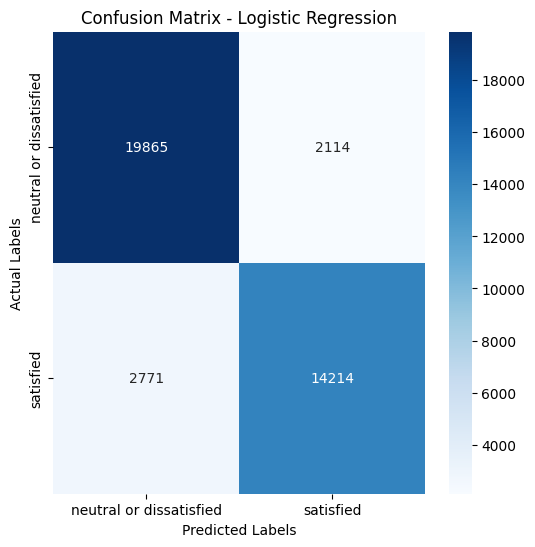

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
labels = ['neutral or dissatisfied', 'satisfied']
confusion_mat = confusion_matrix(Y_test1, lr_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [19]:
#SVM model
from sklearn.svm import SVC

# Train the SVM model
startSVM = time.time()
svm_model = SVC()
svm_model.fit(X_train, Y_train)
endSVM = time.time()
print("time needed to Train SVM model ", endSVM - startSVM, "seconds")
# Make predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(Y_test1, svm_predictions)
svm_precision = precision_score(Y_test1, svm_predictions, pos_label= 1)
svm_recall = recall_score(Y_test1, svm_predictions, pos_label= 1)
svm_f1 = f1_score(Y_test1, svm_predictions, pos_label= 1)


time needed to Train SVM model  194.06072330474854 seconds


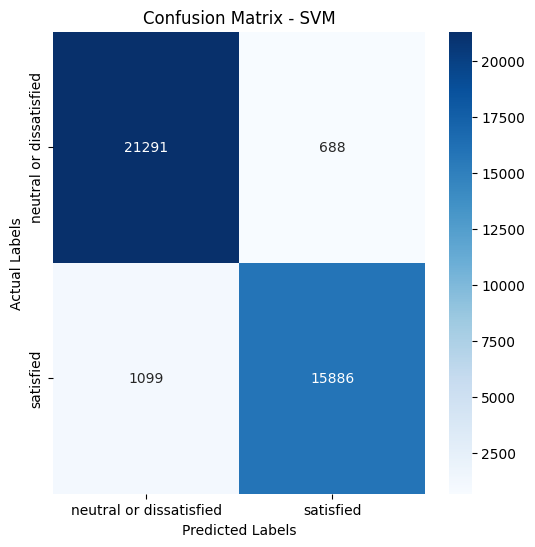

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
labels = ['neutral or dissatisfied', 'satisfied']
confusion_mat = confusion_matrix(Y_test1, svm_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [22]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [23]:
# Define the neural network model
nn_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid"),
])

In [24]:
startNN = time.time()
nn_model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
# Train the neural network model
hist = nn_model.fit(X_train, Y_train, epochs=50, batch_size=32,  validation_data=(X_val, Y_val))

Epoch 1/50
2842/2842 [==============================] - 10s 3ms/step - loss: 0.3646 - accuracy: 0.8495 - val_loss: 0.2483 - val_accuracy: 0.9026
Epoch 2/50
2842/2842 [==============================] - 7s 3ms/step - loss: 0.2570 - accuracy: 0.8994 - val_loss: 0.1954 - val_accuracy: 0.9219
Epoch 3/50
2842/2842 [==============================] - 7s 3ms/step - loss: 0.2262 - accuracy: 0.9101 - val_loss: 0.1792 - val_accuracy: 0.9267
Epoch 4/50
2842/2842 [==============================] - 8s 3ms/step - loss: 0.2063 - accuracy: 0.9171 - val_loss: 0.1657 - val_accuracy: 0.9334
Epoch 5/50
2842/2842 [==============================] - 7s 2ms/step - loss: 0.1955 - accuracy: 0.9211 - val_loss: 0.1615 - val_accuracy: 0.9338
Epoch 6/50
2842/2842 [==============================] - 8s 3ms/step - loss: 0.1874 - accuracy: 0.9235 - val_loss: 0.1529 - val_accuracy: 0.9385
Epoch 7/50
2842/2842 [==============================] - 7s 2ms/step - loss: 0.1799 - accuracy: 0.9267 - val_loss: 0.1494 - val_accuracy

In [26]:
endNN = time.time()
print("time needed to Train NN model ", endNN - startNN, "seconds")

time needed to Train NN model  383.7519180774689 seconds


In [27]:
# Make predictions on the test set
nn_predictions = (nn_model.predict(X_test) > 0.5).astype(int)

# Calculate evaluation metrics
nn_accuracy = accuracy_score(Y_test, nn_predictions)
nn_precision = precision_score(Y_test, nn_predictions, pos_label=1)
nn_recall = recall_score(Y_test, nn_predictions, pos_label=1)
nn_f1 = f1_score(Y_test, nn_predictions, pos_label=1)

609/609 [==============================] - 1s 1ms/step


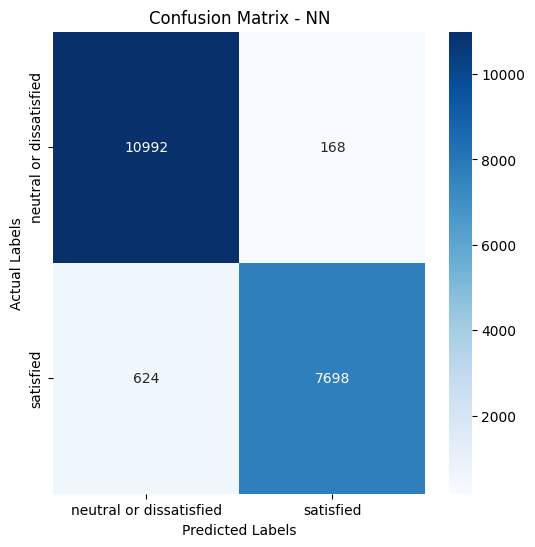

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
labels = ['neutral or dissatisfied', 'satisfied']
confusion_mat = confusion_matrix(Y_test, nn_predictions)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - NN")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

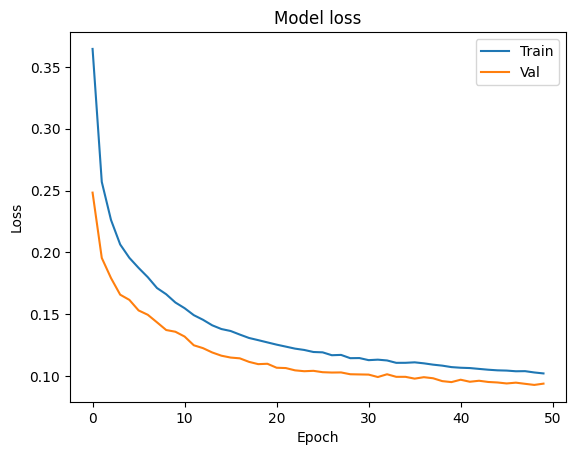

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

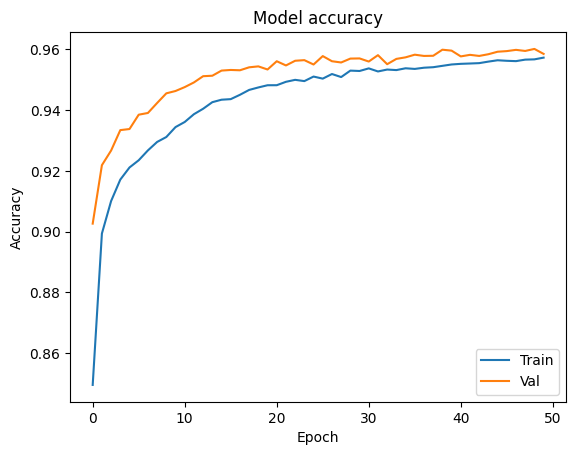

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [31]:
from prettytable import PrettyTable

# Create the table
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score"]

# Add rows to the table with formatted values
table.add_row(["Logistic Regression", "{:.3f}".format(lr_accuracy), "{:.3f}".format(lr_precision), "{:.3f}".format(lr_recall), "{:.3f}".format(lr_f1)])
table.add_row(["SVM", "{:.3f}".format(svm_accuracy), "{:.3f}".format(svm_precision), "{:.3f}".format(svm_recall), "{:.3f}".format(svm_f1)])
table.add_row(["Neural Network", "{:.3f}".format(nn_accuracy), "{:.3f}".format(nn_precision), "{:.3f}".format(nn_recall), "{:.3f}".format(nn_f1)])

# Print the table
print(table)

+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1 Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |  0.875   |   0.871   | 0.837  |  0.853   |
|         SVM         |  0.954   |   0.958   | 0.935  |  0.947   |
|    Neural Network   |  0.959   |   0.979   | 0.925  |  0.951   |
+---------------------+----------+-----------+--------+----------+


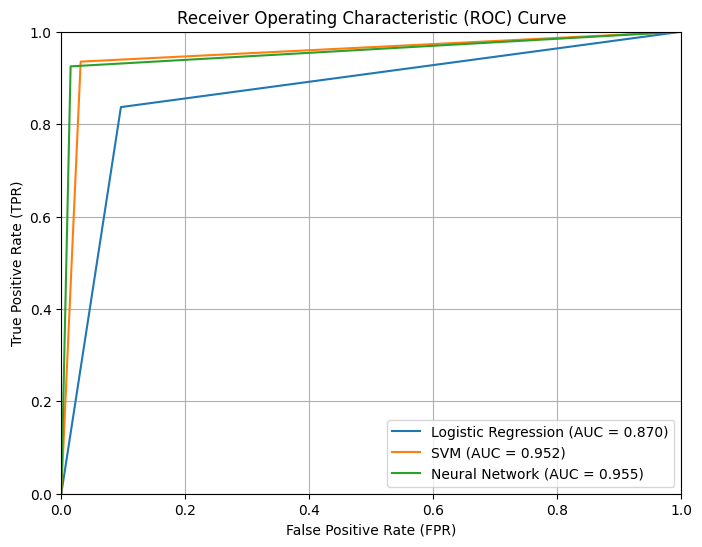

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate (FPR) and true positive rate (TPR) for each model
lr_fpr, lr_tpr, _ = roc_curve(Y_test1, lr_predictions)
svm_fpr, svm_tpr, _ = roc_curve(Y_test1, svm_predictions)
nn_fpr, nn_tpr, _ = roc_curve(Y_test, nn_predictions)

# Calculate the area under the ROC curve (AUC) for each model
lr_auc = auc(lr_fpr, lr_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.3f})'.format(lr_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.3f})'.format(svm_auc))
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = {:.3f})'.format(nn_auc))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()
